# DATA 620, Assignment 4: “High Frequency Words”

### Group 1 Members:

* Mauricio Alarcon
* Sekhar Mekala 
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh 

# Objective

In this assignment, you’re asked to analyze word frequencies for a given corpus.



# Assignment Response

Here we did:

* Selected the 'Moby Dick' corpus for analysis
* Identified total unique words, most common words, and relative frequencies
* Graphed relationships of word frequencies and compared to Zipf's law


In [1]:
import nltk
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  
#gl.canvas.set_target('ipynb') # use IPython Notebook output for GraphLab Canvas

## Loading the Data and Creating Corpus


In [2]:
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [3]:
moby_dick = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
print('Length of corpus is %d words') % len(moby_dick)

Length of corpus is 260819 words


### Corpus Cleaning

In [4]:
stopWords = nltk.corpus.stopwords.words('english')

filtered_w_stopwords = [word.lower() for word in moby_dick if re.search("\w", word)]
filtered_wo_stopwords = [e.lower() for e in filtered_w_stopwords if not e.lower() in stopWords]

In [5]:
len(filtered_w_stopwords)

218621

In [6]:
len(filtered_wo_stopwords)

110719

### 2. How many total unique words are in the corpus?

In [7]:
fdist_w_stopwords = nltk.FreqDist(filtered_w_stopwords)
fdist_wo_stopwords = nltk.FreqDist(filtered_wo_stopwords)
print('There are %d unique words when stopwords are included in text') % len(fdist_w_stopwords)
print('There are %d unique words when stopwords are excluded from text') % len(fdist_wo_stopwords)



There are 17140 unique words when stopwords are included in text
There are 16994 unique words when stopwords are excluded from text


### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [8]:
worddf_w_stopwords = pd.DataFrame(fdist_w_stopwords.most_common(len(fdist_w_stopwords)))
half_total_w_stopwords = len(filtered_w_stopwords)/2
counter = 0
num_words_w_stopwords = 0
for i in range(0, len(worddf_w_stopwords[1])):
    counter = counter + worddf_w_stopwords[1][i]
    if counter >= half_total_w_stopwords:
        num_words_w_stopwords = i
        break
print('The number of unique words that represent half of the total words in the corpus when stopwords are included in the text is %d') % num_words_w_stopwords

The number of unique words that represent half of the total words in the corpus when stopwords are included in the text is 90


In [9]:
worddf_wo_stopwords = pd.DataFrame(fdist_wo_stopwords.most_common(len(fdist_wo_stopwords)))
half_total_wo_stopwords = len(filtered_wo_stopwords)/2
counter = 0
num_words_wo_stopwords = 0
for i in range(0, len(worddf_wo_stopwords[1])):
    counter = counter + worddf_wo_stopwords[1][i]
    if counter >= half_total_wo_stopwords:
        num_words_wo_stopwords = i
        break
print('The number of unique words that represent half of the total words in the corpus when stopwords are excluded from the text is %d') % num_words_wo_stopwords

The number of unique words that represent half of the total words in the corpus when stopwords are excluded from the text is 691


### 4. Identify the 200 highest frequency words in this corpus.

In [10]:
#stopwords included in text
mostcommon_w_stopwords = fdist_w_stopwords.most_common(200)
mostcommon_w_stopwords


[(u'the', 14431),
 (u'of', 6609),
 (u'and', 6430),
 (u'a', 4736),
 (u'to', 4625),
 (u'in', 4172),
 (u'that', 3085),
 (u'his', 2530),
 (u'it', 2522),
 (u'i', 2127),
 (u'he', 1896),
 (u'but', 1818),
 (u's', 1802),
 (u'as', 1741),
 (u'is', 1725),
 (u'with', 1722),
 (u'was', 1644),
 (u'for', 1617),
 (u'all', 1526),
 (u'this', 1394),
 (u'at', 1319),
 (u'whale', 1226),
 (u'by', 1204),
 (u'not', 1151),
 (u'from', 1088),
 (u'him', 1067),
 (u'so', 1065),
 (u'on', 1062),
 (u'be', 1045),
 (u'one', 921),
 (u'you', 894),
 (u'there', 869),
 (u'now', 785),
 (u'had', 779),
 (u'have', 768),
 (u'or', 713),
 (u'were', 684),
 (u'they', 667),
 (u'which', 648),
 (u'like', 647),
 (u'me', 633),
 (u'then', 630),
 (u'their', 620),
 (u'some', 618),
 (u'what', 618),
 (u'when', 606),
 (u'are', 598),
 (u'an', 596),
 (u'my', 589),
 (u'no', 586),
 (u'upon', 566),
 (u'out', 538),
 (u'man', 527),
 (u'into', 523),
 (u'up', 521),
 (u'ship', 518),
 (u'ahab', 511),
 (u'more', 508),
 (u'if', 481),
 (u'them', 474),
 (u'ye', 

In [11]:
#stopwords excluded from text
mostcommon_wo_stopwords = fdist_wo_stopwords.most_common(200)
mostcommon_wo_stopwords

[(u'whale', 1226),
 (u'one', 921),
 (u'like', 647),
 (u'upon', 566),
 (u'man', 527),
 (u'ship', 518),
 (u'ahab', 511),
 (u'ye', 472),
 (u'sea', 455),
 (u'old', 450),
 (u'would', 432),
 (u'though', 384),
 (u'yet', 345),
 (u'head', 345),
 (u'boat', 336),
 (u'time', 334),
 (u'long', 333),
 (u'captain', 329),
 (u'still', 312),
 (u'great', 306),
 (u'said', 304),
 (u'two', 298),
 (u'seemed', 283),
 (u'must', 283),
 (u'white', 281),
 (u'last', 277),
 (u'see', 272),
 (u'thou', 271),
 (u'way', 271),
 (u'whales', 268),
 (u'stubb', 257),
 (u'queequeg', 252),
 (u'little', 249),
 (u'round', 247),
 (u'three', 245),
 (u'sperm', 244),
 (u'men', 244),
 (u'say', 244),
 (u'may', 240),
 (u'first', 235),
 (u'every', 232),
 (u'well', 230),
 (u'us', 228),
 (u'much', 223),
 (u'could', 216),
 (u'good', 216),
 (u'hand', 214),
 (u'side', 208),
 (u'never', 206),
 (u'ever', 206),
 (u'look', 205),
 (u'starbuck', 198),
 (u'deck', 196),
 (u'almost', 195),
 (u'go', 194),
 (u'even', 191),
 (u'water', 190),
 (u'thing', 

### 5. Create a graph that shows the relative frequency of these 200 words

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

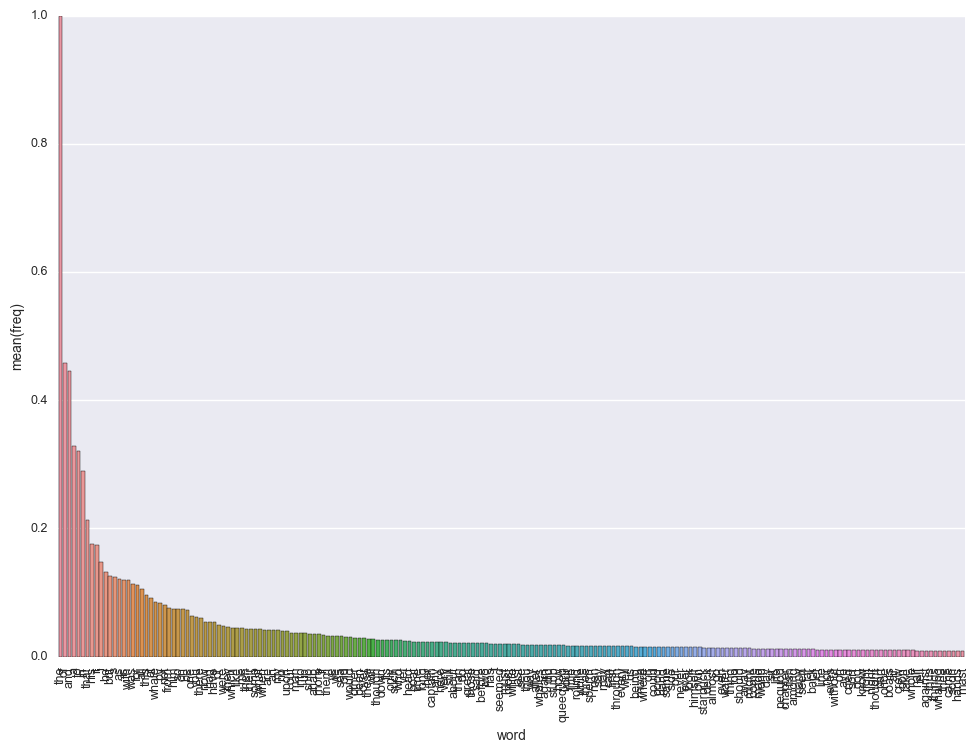

In [52]:
mostcommon_w_stopwords_rfreq = pd.DataFrame(mostcommon_w_stopwords)
mostcommon_w_stopwords_rfreq[1] = mostcommon_w_stopwords_rfreq[1]/mostcommon_w_stopwords_rfreq[1][0]
mostcommon_w_stopwords_rfreq.columns = ['word', 'freq']
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})   
sns.set(font_scale=0.9)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.barplot(x='word', y='freq', data=mostcommon_w_stopwords_rfreq)
plt.xticks(rotation=90)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

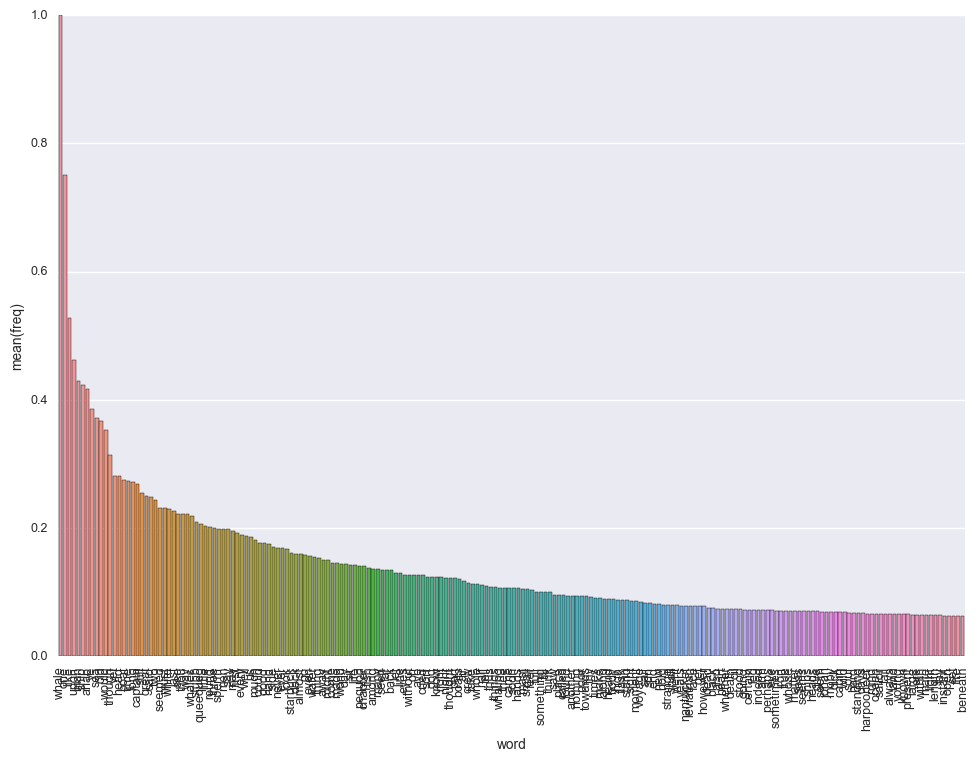

In [53]:
mostcommon_wo_stopwords_rfreq = pd.DataFrame(mostcommon_wo_stopwords)
mostcommon_wo_stopwords_rfreq[1] = mostcommon_wo_stopwords_rfreq[1]/mostcommon_wo_stopwords_rfreq[1][0]
mostcommon_wo_stopwords_rfreq.columns = ['word', 'freq']
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})   
sns.set(font_scale=0.9)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.barplot(x='word', y='freq', data=mostcommon_wo_stopwords_rfreq)
plt.xticks(rotation=90)


### 6. Does the observed relative frequency of these words follow Zipf's law?

Zipf's law generally states that for a large sample of words, the frequency of a particular word is inversely proportional to its rank in the frequency table. Looking at the above graphs, we can see that more frequent words have a "lower" rank (i.e. rank 1 is most frequent) and less frequent words have a "higher" rank. Furthermore, the graphs above follow the basic inverse relationship graphed below:

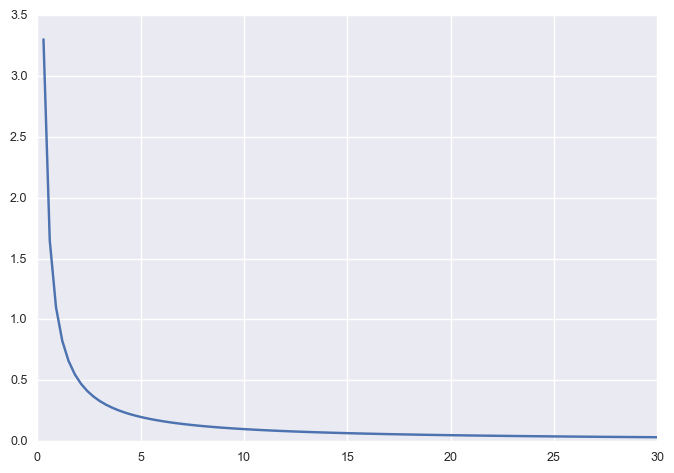

In [55]:
x = np.linspace(0,30,100) # 100 linearly spaced numbers
y = np.reciprocal(x) 
plt.plot(x,y) # sin(x)/x


### 7. In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

I think this corpus differs greatly from all words due to its significant nautical themes. Given these themese, we see very high relative frequencies of words like 'whale', 'ship' and 'sea'. It is generally unlikely that these words would hold the same relative frequency among all words ('whale' is not used nearly so often in the general English language). Any corpus written as a 'book' would tend to have the same issues as virtually any book is written with the goal of conveying a particular theme. 

## Resources

* https://turi.com/products/create/docs/index.html